# Linear Regression - Car Price Prediction
By: Vikram Mathur

#### Objective
Build a multiple linear regression model for the prediction of car prices


# Table Of Contents<br/>

[Setup Environment - Library Installation and Path Set](#SetupEnvironment)<br/><br/>
1. [**Step 1: Reading and Understanding Data**](#RUD)<br/>
    1.1  [Running Pandas Profiler](#PP)<br/>
    1.2  [Reviewing Data Types](#RDT)<br/>
    1.3  [Removing Redundant Columns](#RRC)<br/>
    1.4  [Fixing CarName Feature](#FCF)<br/>
    1.5  [Checking Null Values](#CNV)<br/>
    1.6  [Checking for Duplicates](#CFD)<br/>
 

2. [**Step 2: Visualizing the Data**](#VD)<br/>
    2.1 [Analyzing price dependent variable](#APDV)<br/>
    2.2 [Numerical and Categorical Features Selection](#NCFS)<br/>
    2.3 [Numerical Features](#NA)
    > 2.3.1 [Correlation Analysis](#CA)
    >> 2.3.1.1 [Correlation of Independent Variables (x) with Dependent Variable (y), price](#CIVDV)<br/>
    2.3.1.2 [Correlation of Independent Variables (x)](#CIV)   

    > 2.3.2 [Numeric Feature Analysis for Categorization / Binning (Univariate)](#NFAC)<br/>
    2.3.3 [Outlier Analysis for Continuous Numeric Variables](#OA)<br/>
    
    2.4 [Categorical Features](#CF)<br/>
    > 2.4.1 [Visualizing Categorical Features](#VCF)<br/>
    2.4.2 [Categorical Features with Hue (Tool - For Bivariate Analysis)](#CFWH)<br/>
    
3. [**Step 3: feature Engineering - Data Preparation**](#DP)<br/>
    3.1 [Derived Features and Binning](#DF)<br/>
    > 3.1.1 [carsize: Binning using carlength](#BCL)<br/>
    3.1.2 [brandsegment: Binning using CarName](#BCN)<br/>
    3.1.3 [Power to Weight Ratio](#PWR)<br/>

    3.2 [Label Encoding for Ordered Categorical Variables](#LE)<br/>
    3.3 [Dummy Encoding for Unordered Categorical Variables](#DC)<br/>


4. [**Step 4: Split Data into Training and Test Sets**](#split)<br/>


5. [**Step 5: Training the Model**](#train)<br/>
    5.1 [MinMax Scaling](#MMS)<br/>
    5.2 [RFE](#RFE)<br/>
    5.3 [Building model using statsmodel, for the detailed statistics](#STATS)


6. [**Step 6: Residual Analysis**](#RA)<br/>


7. [**Step 7: Predictions and Evaluation on the Test Set**](#evaluation)<br/>


<a id="SetupEnvironment"></a>
#   Setup Environment - Library Installation and Path Set  

In [1]:
import numpy as np
import pandas as pd

# Plotting libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp # pip install pandas-profiling

# Statsmodel libraries
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import math

import ipywidgets as widgets # pip install ipywidgets
                            # jupyter nbextension enable --py widgetsnbextension
from ipywidgets import interact

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# View max columns
pd.options.display.max_columns = None

<a id="RUD"></a>
#   1. Step 1: Reading and Understanding Data

In [2]:
# Load dataset and view
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<a id="PP"></a>
### 1.1 Running Pandas Profiler

Executing profiler and analyzing results.<br/>
Note: The profiler execution will take time. Kindly wait for the processing to complete.

In [3]:
profile = pp.ProfileReport(df)
# Generate HTML file for easy viewing for later
profile.to_file(outputfile="df_profile_output.html")
profile

Number of variables,26
Number of observations,205
Total Missing (%),0.0%
Total size in memory,41.7 KiB
Average record size in memory,208.4 B
Numeric,15
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,1


  Data Interpretation for Pandas Profiler  <br/>
 -  Profiler shows that there is high correlation between highwaympg and citympg. Suggesting we can choose one of them (citympg) or maybe derive a Mileage metric through them. We will take this decision after computing VIF. Just earmarking this information for now.
 - There are no missing values
 - There are no boolean variables

In [4]:
# Checking the dimensions of the dataset
df.shape

(205, 26)

<a id="RDT"></a>
### 1.2 Reviewing Data Types

In [5]:
# Checking the data types of the dataset to get an understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

  Data Interpretation for Data Types  <br/>
- doornumber, cylindernumber and aspiration seem to be columns that should have discrete integer values and data type should be int16. This analysis will be done during the univariate analysis and if it is string then value would be changed to ordered categorical variables and before modelling they will be label encoded.

In [6]:
# Running describe with 99% quartile range to find outliers, if any.
df.describe([0.25,0.50,0.75,0.95,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
95%,194.800000,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,201.200000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


  Data Interpretation after Dataframe Describe  <br/>
- Can't find standout outliers when we compare 95%, 99% quartiles with max value.
- There seems to be no data quality issue in the numeric variables.

<a id="RRC"></a>
### 1.3 Removing Redundant Columns

In [7]:
# Drop Car_ID column - Its an ID column with unique values and not useful for analysis
print(df['car_ID'].duplicated().value_counts())
df.drop('car_ID', axis = 1, inplace = True)

False    205
Name: car_ID, dtype: int64


<a id="FCF"></a>
### 1.4 Fixing CarName Feature

In [8]:
# Car Name Column - Updating it to include the name of the company and removing the car model name
df['CarName'] = df['CarName'].str.split(" ").str[0].str.lower()
print(df['CarName'].value_counts())

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Name: CarName, dtype: int64


  Data Interpretation for Car Name  <br>
- There are data issues in terms of spelling mistakes that are to be fixed.
- Brand Name - Mercury has only one row and ideally can be deleted. However, keeping it as is and not removing yet. Will take a call during the modelling phase if this dummy column shows higher rating and significance.

In [9]:
#Fix data issues in the column Car Name. Spelling errors
df.loc[df['CarName'] == 'vokswagen','CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'vw','CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'maxda','CarName'] = 'mazda'
df.loc[df['CarName'] == 'porcshce','CarName'] = 'porsche'
df.loc[df['CarName'] == 'toyouta','CarName'] = 'toyota'
print(df['CarName'].value_counts())

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64


<a id="CNV"></a>
### 1.5 Checking Null Values

In [10]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

price               0
carheight           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
curbweight          0
highwaympg          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
symboling           0
dtype: int64

  Data Interpretation for Null Values  
- There are no missing values in the dataset

<a id="CFD"></a>
### 1.6 Checking for Duplicates

In [11]:
#Checking for Duplicates without the Price column
print(df.drop('price',axis=1).duplicated().value_counts())

# Printing the duplicated rows removing the dependent variable
df.loc[df.drop('price',axis=1).duplicated(), :]

False    197
True       8
dtype: int64


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.0,111,5000,21,27,16500.0
26,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.230,9.4,68,5500,31,38,7609.0
48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.170,8.1,176,4750,15,19,35550.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
61,1,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.390,8.6,84,4800,26,32,10595.0
62,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.390,8.6,84,4800,26,32,10245.0
116,0,peugeot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.520,21.0,95,4150,28,33,17950.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.900,9.5,207,5900,17,25,34028.0


  Data Interpretation for Duplicate rows  
- Keeping duplicate rows as is while training the model. The reason being that there must be some other parameter that might be impacting the price which is not present in the dataset. We can assume the same in the test dataset. Hence training the model with duplicates.

<a id="VD"></a>
#   2. Step 2: Visualizing the Data  

<a id="APDV"></a>
### 2.1 Analyzing price dependent variable

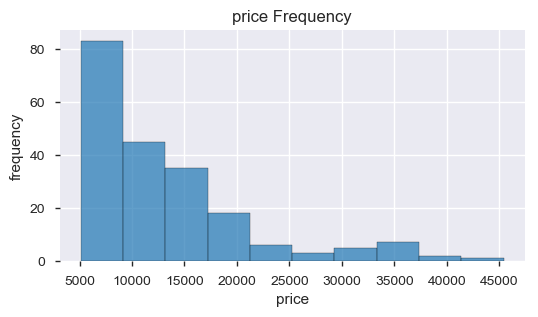

In [12]:
# Analyzing price
def histogram(col_name):
    plt.figure(figsize=(6,3))
    plt.hist(df[col_name],alpha=0.7, ec='black')
    plt.xlabel(col_name)
    plt.ylabel('frequency')
    plt.title(col_name + ' Frequency')
    plt.plot()

histogram('price')

  Data Interpretation of Price  
 - The price is skewed towards the right.
 -  Most of the car prices lie between 5000 to 20000.

<a id="NCFS"></a>
### 2.2 Numerical and Categorical Features Selection

Selecting features firstly based on the data type and information available in data dictionary

In [13]:
#selecting numerical variables
numerical_features = list(df.select_dtypes(include=['int64','float64']).columns)
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df.select_dtypes(include='object').columns)
print("Categorical Columns: ", categorical_features)

Numerical Columns:  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical Columns:  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [14]:
# Checking categorization of the symboling
print(df['symboling'].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


  Data Interpretation of Numerical and Categorical Features  
- Symboling feature is a categorical feature and not numeric feature
- Price is the dependent variable (y) and needs to be removed from the feature list

In [15]:
# Symboling is a categorical variable. Removing from numerical_features and adding to categorical_features
numerical_features.remove('symboling')
categorical_features.append('symboling')

In [16]:
#Removing the Dependent Variable (y), price from the numerical_features
numerical_features.remove('price')

<a id="NF"></a>
## 2.3 Numerical Features

<a id="CA"></a>
### 2.3.1 Correlation Analysis

<a id="CIVDV"></a>
#### 2.3.1.1 Correlation of Independent Variables (x) with Dependent Variable (y), price

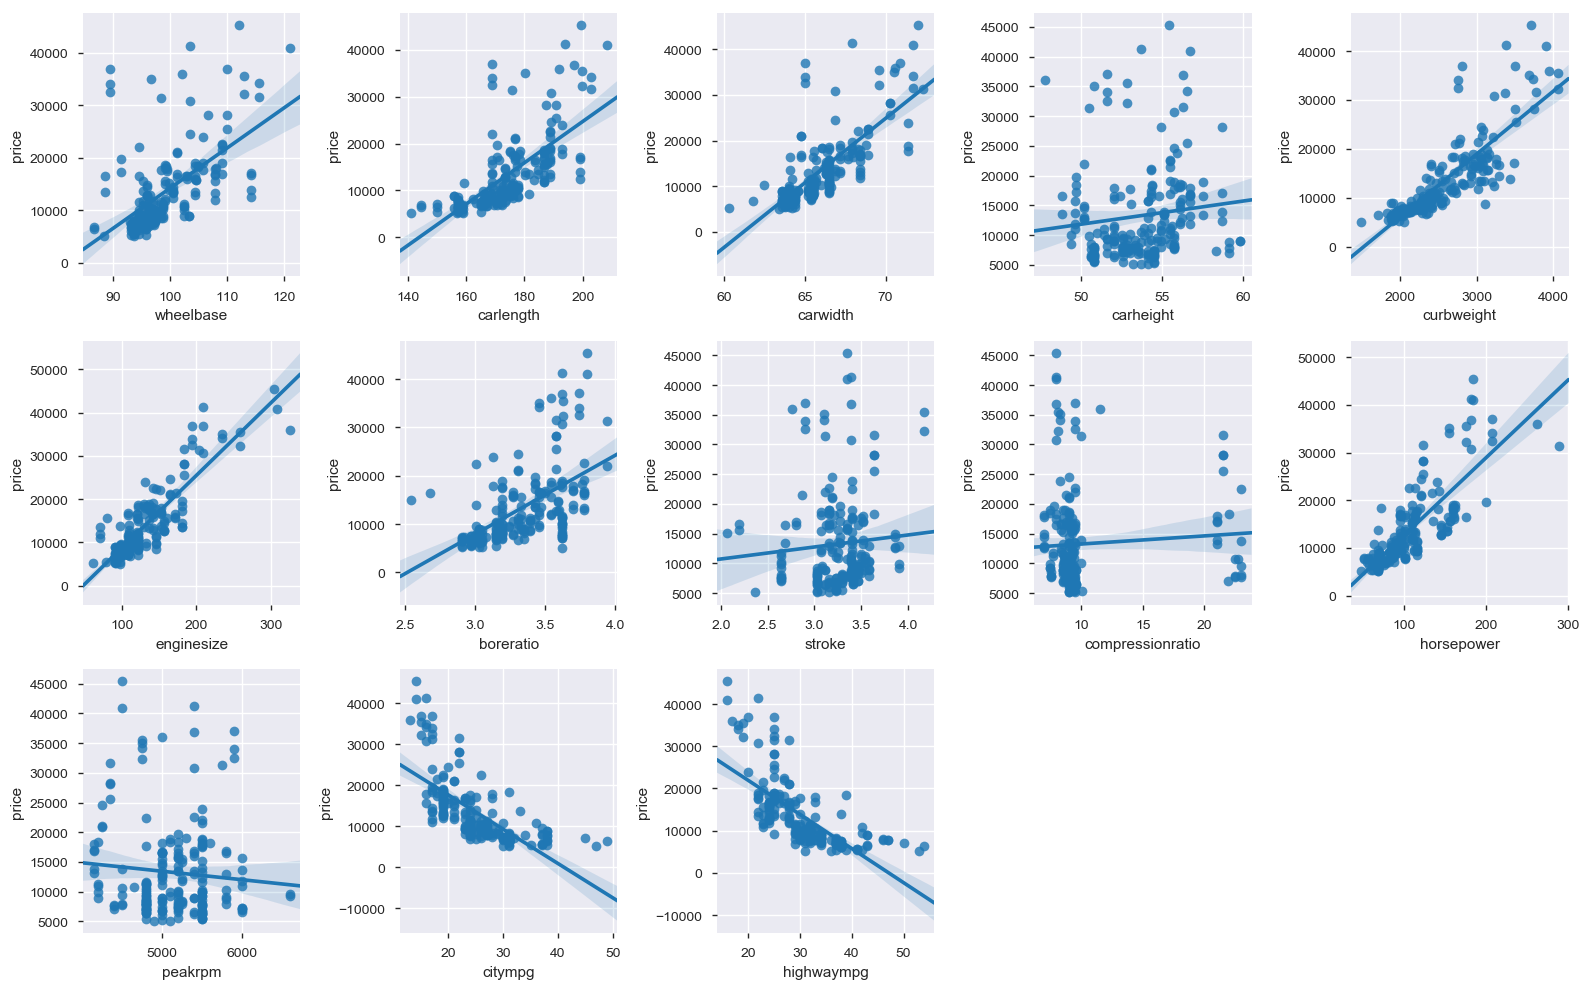

In [17]:
# Plotting
rows = math.ceil(len(numerical_features) / 5)
plt.figure(figsize=(16,10))
for i in range(0,len(numerical_features)):
    plt.subplot(rows, 5, i+1)
    sns.regplot(x=numerical_features[i],y='price',data=df)
plt.tight_layout()
plt.show()

In [18]:
# Printing the correlation with Price
print(round(df.corr()['price']*100))

symboling            -8.0
wheelbase            58.0
carlength            68.0
carwidth             76.0
carheight            12.0
curbweight           84.0
enginesize           87.0
boreratio            55.0
stroke                8.0
compressionratio      7.0
horsepower           81.0
peakrpm              -9.0
citympg             -69.0
highwaympg          -70.0
price               100.0
Name: price, dtype: float64


  Data Interpretation of Correlation between Independent Variables (x) and Dependent Variable (y, price)   
- Dependent Variable (y), Price has high correlation with the following (_taking greater than equal to 70%_)
  - carwidth (76%)
  - curbweight (84%)
  - enginesize (87%)
  - horsepower (81%)
  - highwaympg (-70%)
  
  It is important to analyze the relation of these independent variables with each other before taking any decision


- carheight, stroke, peakrpm and compressionratio does not seem to have a correlation with price

    

<a id="CIV"></a>
#### 2.3.1.2 Correlation of Independent Variables (x)

<Figure size 2000x2000 with 0 Axes>

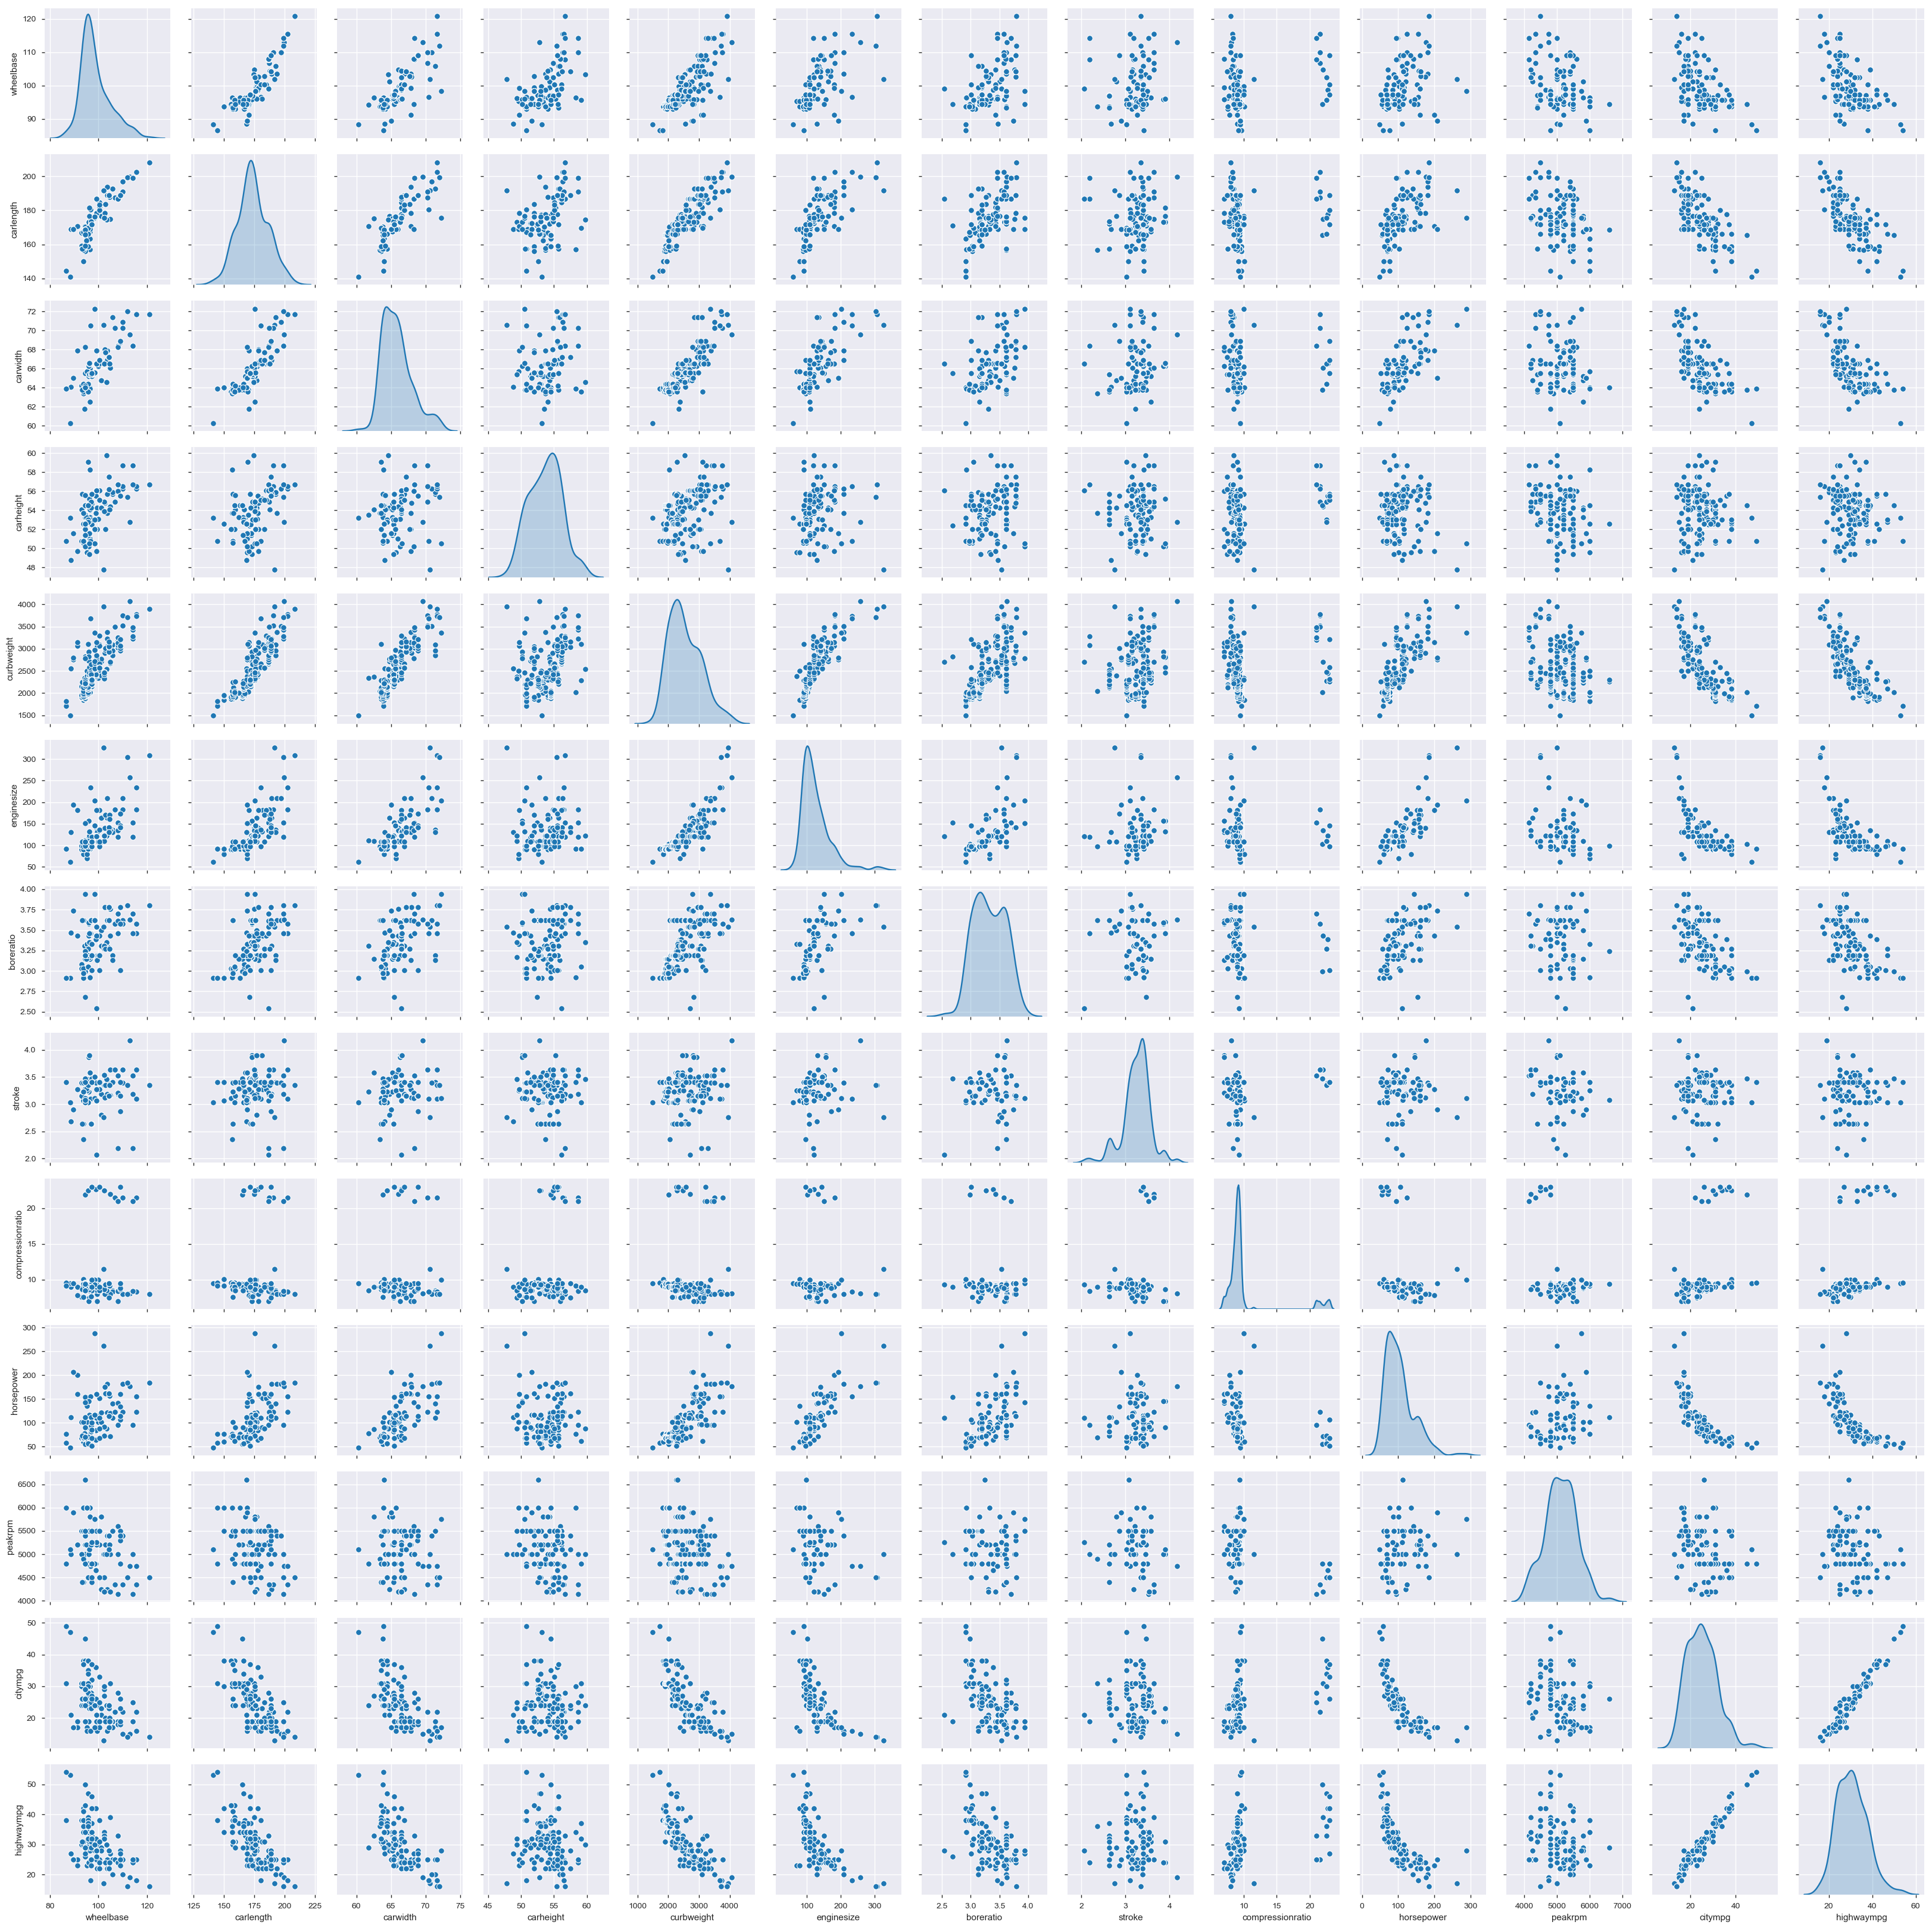

In [19]:
# Plotting pair plot to view correlation for numerical features
plt.figure(figsize=(20,20))
sns.pairplot(df[numerical_features], diag_kind = "kde", palette = "husl")
plt.show()

  Data Interpretation of Correlation of Independent Variables  
- The pair plots and even Pandas profiler indicating that citympg and highwaympg are highly correlated. Ideally one should be selected like citympg or maybe a mileage feature can be added which would be the mean of these two.
- Other high correlations visible but not interpretable in from the figure.
- Better to write a custom function to give the list of top 10 positively and negatively correlated features.

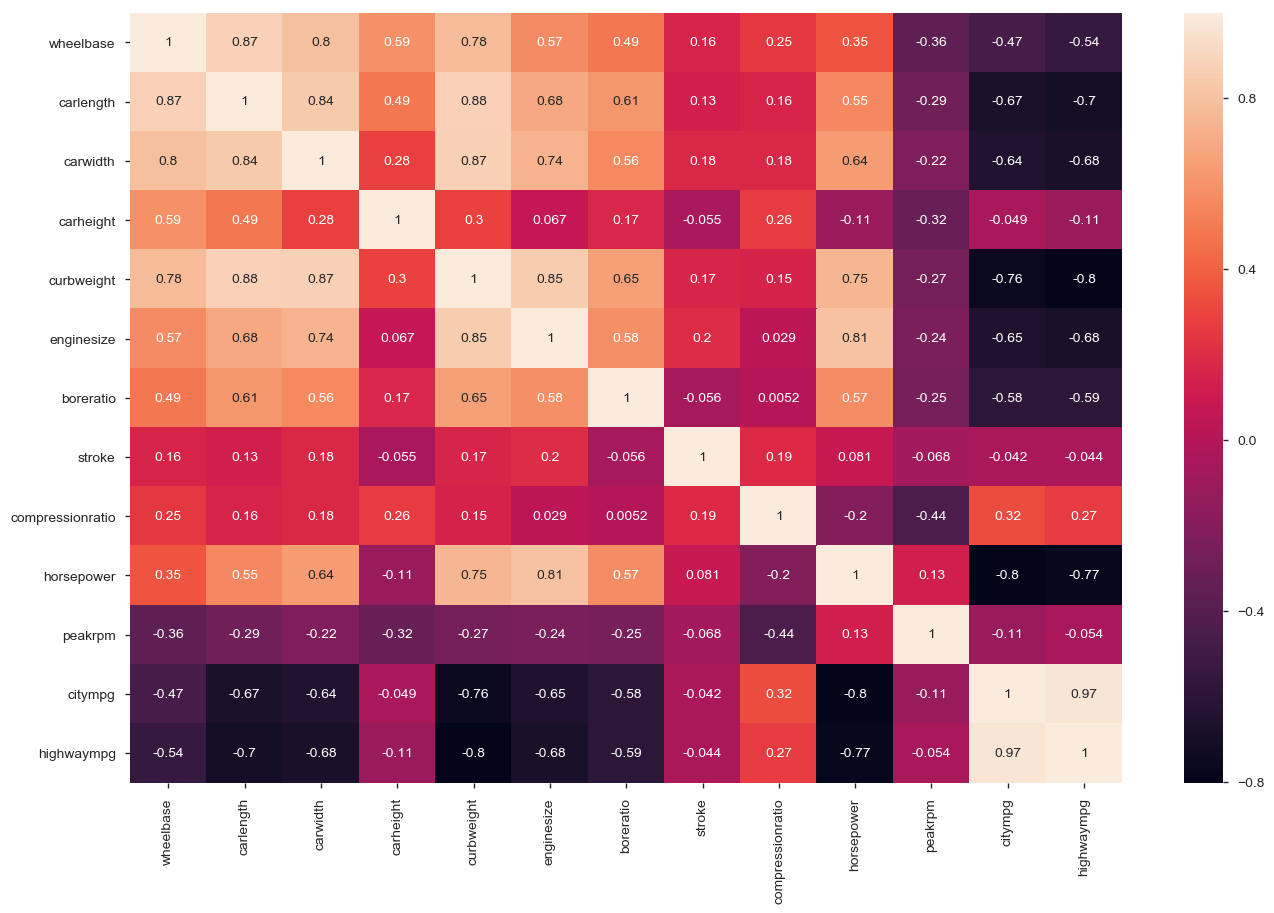

In [20]:
#plotting a heat map to view correlation
plt.figure(figsize=(16,10))
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.show()

##### Top 10 Correlations of Dependent Variables
- Writing a custom function that prints the top 10 positively and negatively correlated pairs. 
- The function removes the "Price" that is the "y" variable and compares only the dependent variables, "x"

In [21]:
def topcorr(df,cols):
    df_corr = pd.DataFrame(round(df[cols].corr()*100).unstack().reset_index())
    df_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'}, inplace=True)
    df_corr = df_corr[df_corr['Feature_1'] != df_corr['Feature_2']]
    df_corr = df_corr[df_corr['Feature_1'] != 'price']
    df_corr = df_corr[df_corr['Feature_2'] != 'price']
    df_corr.drop_duplicates(subset='Correlation', inplace=True)
    print("TOP 10 HIGH POSITIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=False).head(10))
    print("\nTOP 10 HIGH NEGATIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=True).head(10))

topcorr(df, numerical_features)

TOP 10 HIGH POSITIVE CORRELATION % 

      Feature_1   Feature_2  Correlation
155     citympg  highwaympg         97.0
17    carlength  curbweight         88.0
1     wheelbase   carlength         87.0
57   curbweight  enginesize         85.0
15    carlength    carwidth         84.0
74   enginesize  horsepower         81.0
2     wheelbase    carwidth         80.0
4     wheelbase  curbweight         78.0
61   curbweight  horsepower         75.0
31     carwidth  enginesize         74.0

TOP 10 HIGH NEGATIVE CORRELATION % 

      Feature_1   Feature_2  Correlation
64   curbweight  highwaympg        -80.0
129  horsepower  highwaympg        -77.0
63   curbweight     citympg        -76.0
25    carlength  highwaympg        -70.0
38     carwidth  highwaympg        -68.0
24    carlength     citympg        -67.0
76   enginesize     citympg        -65.0
37     carwidth     citympg        -64.0
90    boreratio  highwaympg        -59.0
89    boreratio     citympg        -58.0


  Data Interpretation on Top 10 correlations  
- None of the highly correlated features are not being removed as of now since they have correlations with other independent variables. The deletions will happen after analyzing VIF.
- highwaympg and citympg having high correlation of 97%. Ideally only 1 of them can be chosen, preferrably citympg or maybe a Mileage column can be created with the average of highwaympg and citympg.
- We can combine certain features into single feature based on high correlation like Mileage, CarDimensions
- It seems a derived variable of CarDimension can be created having the value of CarLength*CarWidth
- Wheelbase is correlated with carlength, carwidth and curbweight

In [22]:
# Analyzing the correlation of highwaympg with the rest of the dataset
print(round(df[numerical_features].corr()['highwaympg']*100))

wheelbase           -54.0
carlength           -70.0
carwidth            -68.0
carheight           -11.0
curbweight          -80.0
enginesize          -68.0
boreratio           -59.0
stroke               -4.0
compressionratio     27.0
horsepower          -77.0
peakrpm              -5.0
citympg              97.0
highwaympg          100.0
Name: highwaympg, dtype: float64


  Data Interpretation of highwaympg with other independent variables  
 - It is observed that along with citympg, highwaympg has high correlation with carlength, curbweight and horsepower.
 - Hence, not removing the column during this stage and will wait for VIF computation

In [23]:
# Analyzing the correlation of citympg with the rest of the dataset
print(round(df[numerical_features].corr()['citympg']*100))

wheelbase           -47.0
carlength           -67.0
carwidth            -64.0
carheight            -5.0
curbweight          -76.0
enginesize          -65.0
boreratio           -58.0
stroke               -4.0
compressionratio     32.0
horsepower          -80.0
peakrpm             -11.0
citympg             100.0
highwaympg           97.0
Name: citympg, dtype: float64


  Data Interpretation of citympg with other independent variables  
 - It is observed that along with citympg, highwaympg has high correlation with curbweight and horsepower.
 - The independent variables correlated with citympg seem similar to the ones correlated with highwaympg and hence signifying that one of them can be chosen.
 - Decision will taken after VIF calculation

In [24]:
# Analyzing the correlation of carlength with the rest of the dataset
print(round(df[numerical_features].corr()['carlength']*100))

wheelbase            87.0
carlength           100.0
carwidth             84.0
carheight            49.0
curbweight           88.0
enginesize           68.0
boreratio            61.0
stroke               13.0
compressionratio     16.0
horsepower           55.0
peakrpm             -29.0
citympg             -67.0
highwaympg          -70.0
Name: carlength, dtype: float64


  Data Interpretation of carlength with other independent variables  
 - It is observed that there is high correlation with wheelbase, carwidth, curbweight, highwaympg.

In [25]:
# Analyzing the correlation of carwidth with the rest of the dataset
print(round(df[numerical_features].corr()['carwidth']*100))

wheelbase            80.0
carlength            84.0
carwidth            100.0
carheight            28.0
curbweight           87.0
enginesize           74.0
boreratio            56.0
stroke               18.0
compressionratio     18.0
horsepower           64.0
peakrpm             -22.0
citympg             -64.0
highwaympg          -68.0
Name: carwidth, dtype: float64


  Data Interpretation of carwidth with other independent variables  
 - It is observed that there is high correlation with wheelbase, carlength, curbweight and enginesize
 - Can't drop one of the columns between carlength or carwidth as of now.

<a id="NFAC"></a>
### 2.3.2 Numeric Feature Analysis for Categorization / Binning

##### Car Length Feature Analysis for Categorization

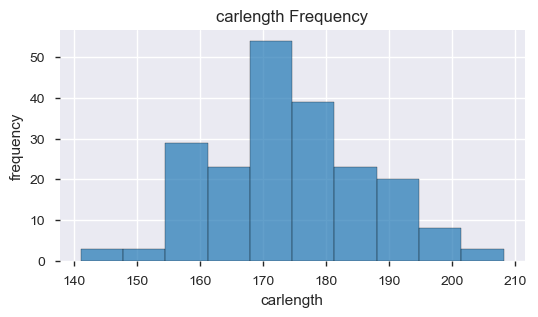

In [26]:
histogram('carlength')

  Data Interpretation of carlength  
 + From a business perspective it makes sense to use carlength and bin it into the carsize
  + Compact
  + MidSize
  + Large
  + Very Large
 + We can convert the feature into metres and then bin

##### Engine Size Feature Analysis
Converting Engine Size from Cubic Inch to Cubic Centimetre for realistic understanding

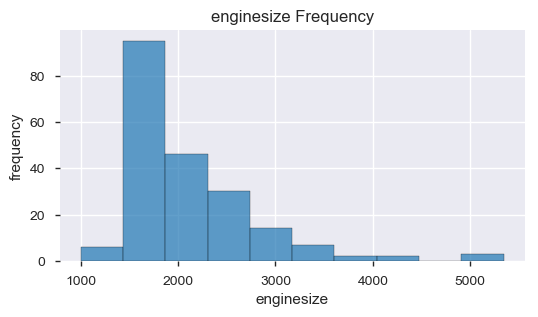

In [27]:
# Enginesize in Cubic Centimetre
df['enginesize'] = round(df['enginesize'] / 0.0610237)
histogram('enginesize')

  Data Interpretation for enginesize  
 + The enginesize is skewed towards the right.
 + Mostly the enginesize ranges between 1500 cc to 3000 cc
 + There is a possibility of creating categories of car segment based on enginesize but not considering it.

<a id="OA"></a>
### 2.3.3 Outlier Analysis for Continuous Numerical Variables

Checking outliers for numerical features

In [28]:
# In order to check for outliers 95 and 99 percentile information is seeked which can be compared with the max value.
# Drastic jump from 99% to max may indicate outliers.
df.describe([0.25,0.50,0.75,0.95,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,2079.736585,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,682.352418,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,1000.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,1590.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,1966.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,2311.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
95%,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,3297.400000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,4951.840000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,5342.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


  Data Interpretation of outliers from dataset description  
 - Can't find significant outliers when we compare 95%, 99% quartiles with max value.
 - There seems to be no data quality issue in the numeric variables. There are values that are away from the 25% to 75% quartiles but they seem all legitimate values and dont represent skewness or data quality issues.
 - No action needed based on this.
 - Next step is to plot box plots to visualize the outliers and then analyze.

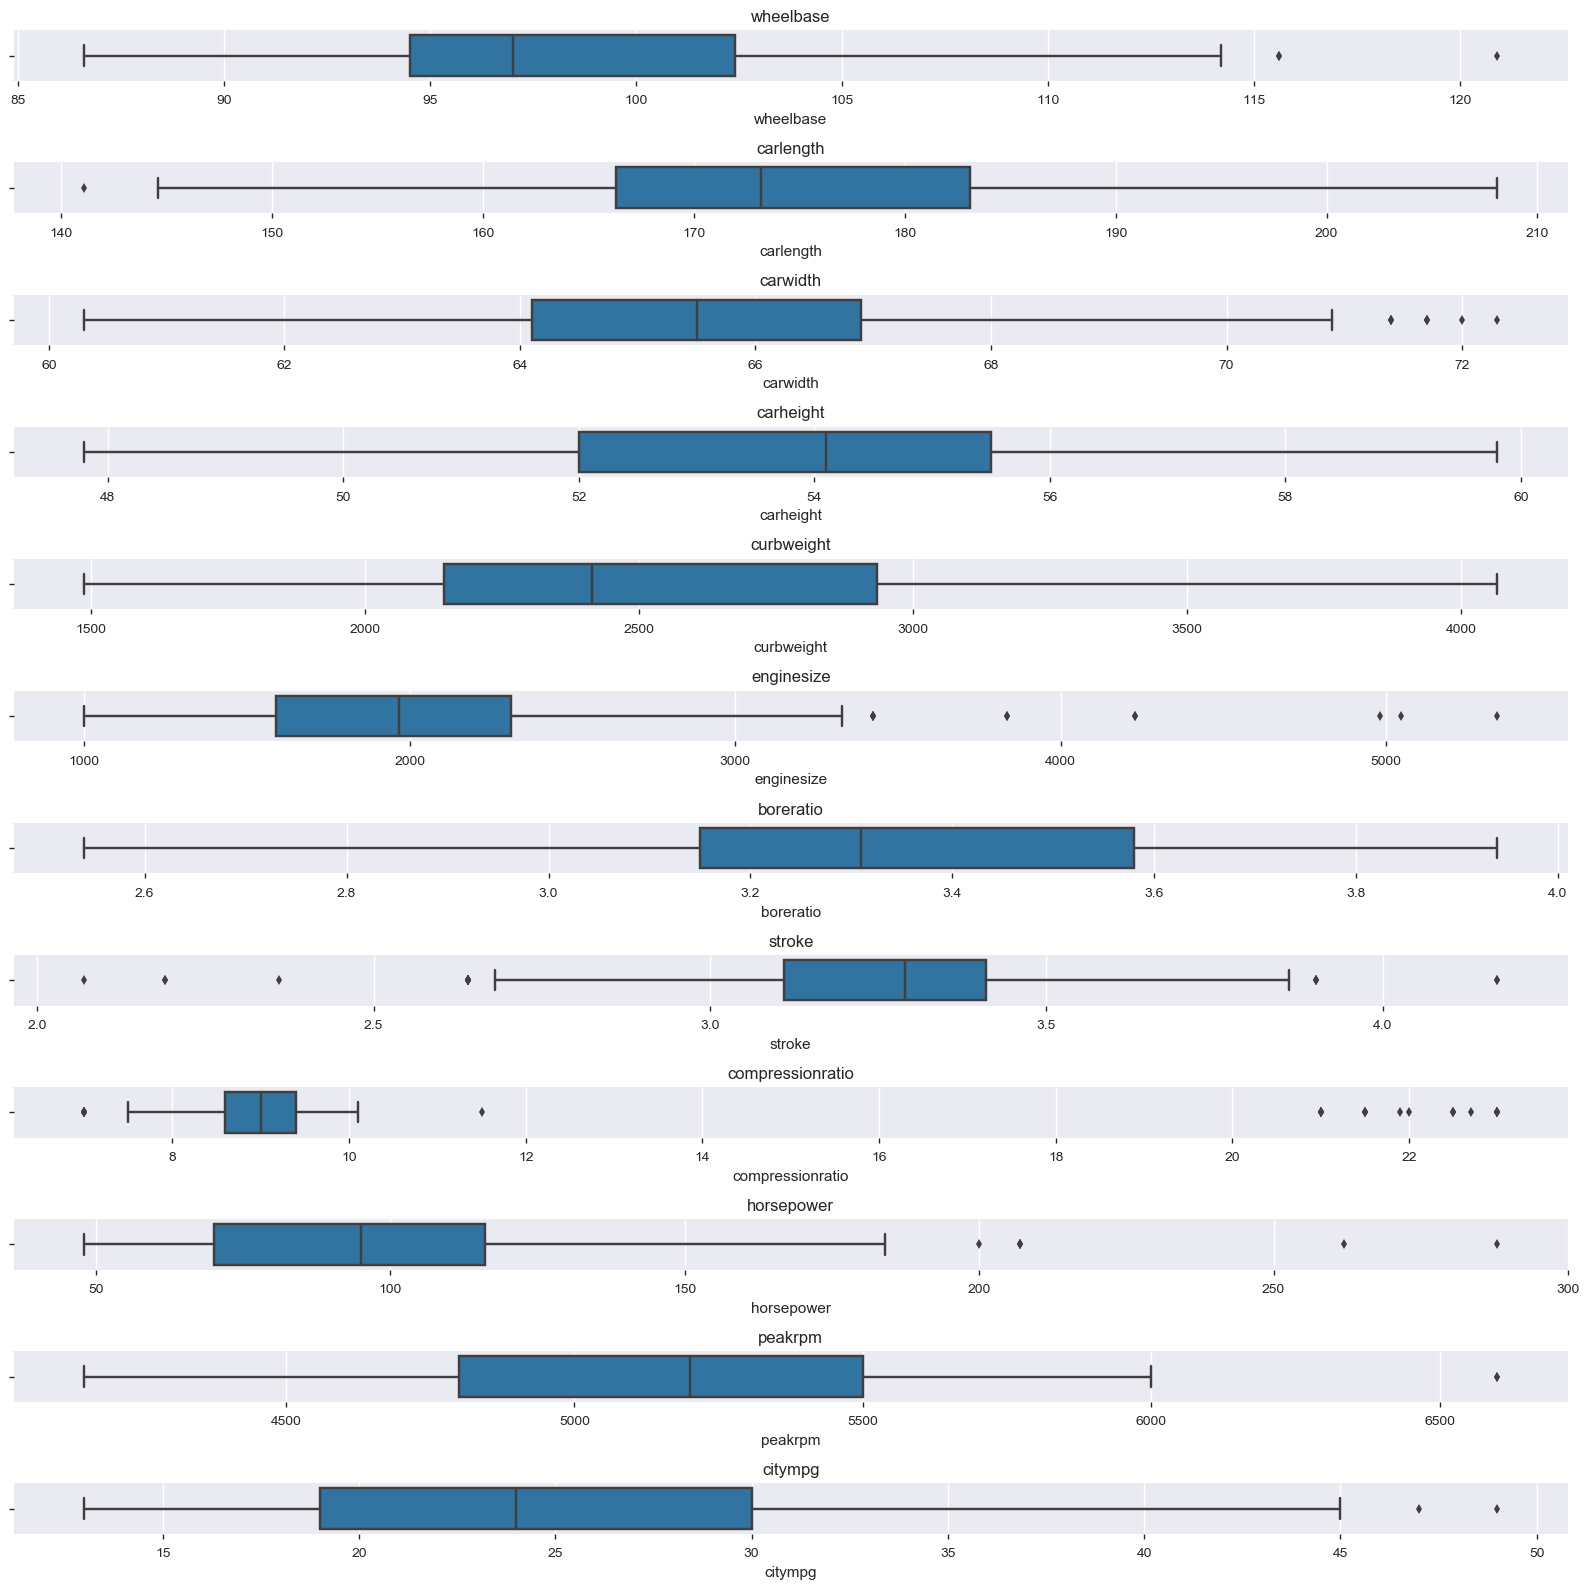

In [29]:
# generic function to plot box plots to view presence of outliers.
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols)-1, figsize=(16,16))
    for i in range(0,len(cols)-1):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df, numerical_features)

  Data Interpretation based on Outlier Analysis  <br/>
 - **Engine Size**: The box plot displays outliers, but realistically there are luxury or sports cars which will have over 300 or even 400 cubic inch as engine size. Hence this is not a data quality issue but valid values. Similary, **peakrpm**, **citympg**, **horsepower**, **carwidth** and **wheelbase** don't have data quality issue in terms of having outliers. They have valid values.
 - **Compression Ratio**: From a business perspective the compression ratio lies in the range of 6:1 to 10:1 that is 6 to 10. However, here in the dataset there are values beyond 20.
 - It would be interesting to analyze the dataset for which the compression ratio is > 20                

In [30]:
print('Fuel Type for compression ratio > 20', df.query('compressionratio > 20')['fueltype'].value_counts())
print('Fuel Type for compression ratio < 20',df.query('compressionratio < 20')['fueltype'].value_counts())

Fuel Type for compression ratio > 20 diesel    20
Name: fueltype, dtype: int64
Fuel Type for compression ratio < 20 gas    185
Name: fueltype, dtype: int64


 - compression ratio does not have any outliers. The gas fuel type has compression ratio < 20 whereas the diesel fuel type has compression ratio > 20

<a id="CF"></a>
## 2.4 Categorical Features

Checking the values of all categorical variables to detemine if there is any data quality issue

In [31]:
# Checking data for errorneous entries, missing values etc.
for i in categorical_features:
    print(i, df[i].unique())

CarName ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
fueltype ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumber ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
symboling [ 3  1  2  0 -1 -2]


  Data Interpretation of Categorical Variables  
1. **enginetype**

 The seven engine type full forms for business understanding and to check if categorization possible.
  + dohc (Dual OverHead Cam)
  + dohcv (Dual OverHead Cam and Valve) - _This type of engine does not seem to exist and is probably a data issue and this should be dohc_
  + l (L engine)
  + ohc (OverHead Cam)
  + ohcf (OverHead Cam and Valve F engine)
  + ohcv (OverHead Cam and Valve)
  + rotor (Rotary engine).
 
 With the above definitions unable to understand the categorization due to lack of business understanding, hence not reducing these categories in sub categories and also not fixing assumed data issues


2. **fuelsystem**

 The business understanding to check if categorization is possible
  + pfi - port fuel injection:
        + mfi - _both mfi and mpfi seem to be the same. This is probably a data issue_
        + mpfi (multi port fuel injection)
        + spfi (sequential port fuel injection)
  + idi - indirect injection
  + bbl - barrels
        + 1bbl - 1 hole 
        + 2bbl - 2 holes side by side
        + 4bbl - 4 holes (2 in front and 2 at rear)
        
   With the above definitions reducing in categories seem possible but due to lack of deep domain knowledge not categorizing these values. Also not fixing assumed data issues.


<a id="VCF"></a>
### 2.4.1 Visualizing Categorical Features

In [1]:
# preparing a box plot to view distribution based on price
# preparing frequency distribution plot to know the number of occurences

def plot_categorical_feature(feature):
    plt.figure(figsize=(16,4))
    #box plot with price
    plt.subplot(1,2,1)
    plt.title(feature + " distribution with price")
    sns.boxplot(x=feature,y='price',data=df)
    plt.xticks(rotation=45)
    
    #bar plot frequency distribution
    plt.subplot(1,2,2)
    ser = round(df[feature].value_counts()/len(df[feature])*100,1)
    plt.title(feature + " frequency distribution")
    ax = sns.barplot(x=ser.index, y=ser.values, orient="v", palette=("Blues_d"))
    for j in ax.patches:
        if (j.get_height() != 0):
            ax.text(j.get_x()-0.1 + j.get_width()/2., j.get_y()+0.3 + j.get_height(), str(j.get_height()), fontsize=11, color='black')
    
    plt.ylabel('frequency (%)')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()
    
for i in range(0,len(categorical_features)):
    plot_categorical_feature(categorical_features[i])

NameError: name 'categorical_features' is not defined

  Data Interpretation of Categorical Features  <br/><br/>
1. Following features appear to be **ordered categorical variables**. These features should ideally be label encoded for training the model 
  + doornumber
  + cylindernumber
  + aspiration (as turbo is better than std) - _Debatable_. Refer to Pt. 4 below.
  + symboling (as the rating goes from -3 (very safe) to +3 (very risky))  


2. bmw, buick, jaguar and porche are the car brands that seem to increase price of the car. Toyoto, Nissan and Mazda has the highest frequency distribution.


3. There is slight price difference in the median of gas and diesel **fuel type** cars. With the median of diesel cars being higher.
 + 90% of vehicles are gas and only 10% diesel


4. Turbo engine cars median is higher than std. But there are some cars with std. as aspiration which cost much higher than turbo engines. Hence we can't be sure if Turbo engine is truly better than standard engines. There could be other parameters driving it too.


5. **doornumbers** (2 or 4) seem to have the same impact on the price. Not much seprating these two values.


6. **carbody** convertible and hardtop impact the price positively. The price is higher for these cars. Also, for sedans there are some variants which cost way above it's median.
 + However, point to note is that there are very less cars which are convertible or hardtop


7. **drivewheel**, the rwd cars seem to be priced much higher than fwd or 4wd. From a business perspective some luxury brands have rear wheel drive. Hence, the being rear wheel may or may not be a sole driving factor for car price, but it should be compared with the brand name and see if the brand name is making an impact. Also, some cars having high horsepower also have rear wheel drives.
 + Only 4.4% cars have 4wd


8. **Rear engine location** has much higher price. Typically, again for luxury brands and sports cars it is known that they have rear engines and hence price may be higher.
 + Only 1.5% cars have rear engine in this dataset
 + Rear engine cars are significantly higher priced


9. Higher **cylinder numbers** seems to increase the price of the car.
 + Mostly cars have four cylinders
 + Very less frequency occurence of twelve and three cylinders


10. mpfi and idi **fuel systems** seems to increase the price of the car.
 + 46% occurence of mpfi fuel system cars
 + mfi and spfi have hardly any occurence. These should ideally not be considered.


11. The **engine type** ohcv seems to increase the price of the car. 'dohcv' engine type has very low occurence frequency.


12. **Symboling** of -3 (very safe) does not exist. Mostly cars have 0 as the symboling rating. Mostly cars are in the risk range.

##### Car Name Feature Analysis for Binning

In [33]:
# Top 5 prices based on car company
df_CarName = df[['CarName','price']].groupby('CarName').mean().reset_index()
df_CarName = df_CarName.sort_values(by='price', ascending=False)
df_CarName.head(5)

,CarName,price
8,jaguar,34600.000000
3,buick,33647.000000
15,porsche,31400.500000
2,bmw,26118.750000
21,volvo,18063.181818


[]

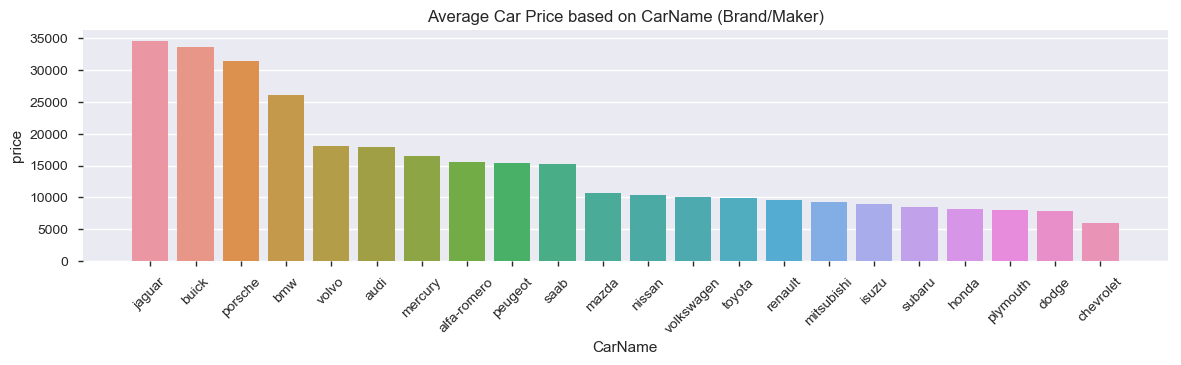

In [34]:
plt.figure(figsize=(14,3))
plt.title('Average Car Price based on CarName (Brand/Maker)')
sns.barplot(x='CarName', y='price', data=df_CarName)
plt.xticks(rotation=45)
plt.plot()

  Data Interpretation based on further analysis of CarName  
 + jaguar, buick, porshe, bmw and volvo are the top 4 priced cars
 + chevrolet has the lowest average price
 + Seems we can bin the CarName based on price range:
   + Low-Segment: 0 to 12k
   + Mid-Segment: 12k to 24k
   + High-Segment: 24k plus

<a id="CFWH"></a>
### 2.3.2 Categorical Features with Hue (Tool - For Bivariate Analysis)

<function matplotlib.pyplot.show(*args, **kw)>

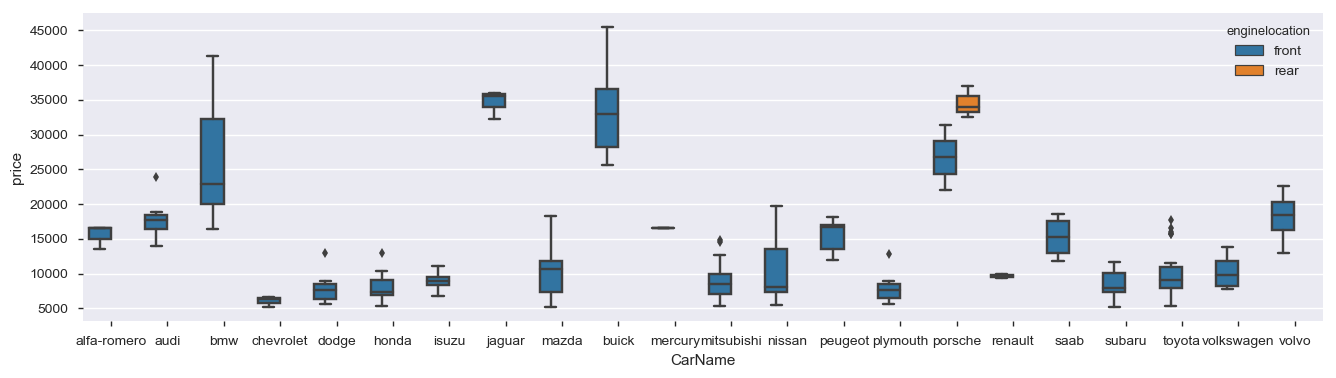

In [35]:
# Analyzing Engine Location with the Car Name
plt.figure(figsize=(16,4))
sns.boxplot(x='CarName', y='price', hue= 'enginelocation', data=df)
plt.show

  Data Interpretation of Engine Location with Car Name  
- Rear engine location is only present in Porche cars

##### Generic Tool - Category and Hue (Bivariate Categorical Variable Analysis)
Easy Bivariate analysis by selecting Category and Hue from the combo boxes

In [36]:
# Analyzing data based on category and Hue to understand the Data and impact.
def cmb_change(Category, Hue):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=Category, y='price', hue= Hue, data=df)
    plt.show()
interact(cmb_change, Category = sorted(categorical_features,reverse=True), Hue = categorical_features)

interactive(children=(Dropdown(description='Category', options=('symboling', 'fueltype', 'fuelsystem', 'engine…

<function __main__.cmb_change(Category, Hue)>

<a id="DP"></a>
#   3. Step 3: Feature Engineering - Data Preparation  

<a id="DF"></a>
### 3.1 Derived Features and Binning

1. highwaympg and citympg are highly correlated and signify the mileage. 
 - They can be combined into a new feature **mileage** by taking their mean. OR
 - Only citympg to be considered - _choosing this option and will drop highwaympg once VIF calculated_


2. carlength and carwidth are highly correlated and signify the cardimension. 
 - They can be combined into a new feature **cardimension** by multiplying them. OR
 - One of the feature of carelength or carwidth to the considered. But these features are correlated with other features too and hence will wait for VIF calculation


3. **carsize** - creating the carsize derived feature category / bin from the carlength


4. **brandsegment** - creating brandsegment feature category / bin from the CarName. Will remove CarName feature.


5. **powerweightratio** - creating new derived feature

<a id="BCL"></a>
#### 3.1.1 carsize: Binning using carlength
Creating following carsize bins based on carlength
  + Compact < 4 metres
  + MidSize > 4 metres and < 4.5 metres
  + Large > 4.5 metres and < 5 metres
  + Very Large > 5 metres
  
But not removing carlength feature as it is highly correlated with other independent variables too

In [37]:
# car length into meters
df['carlength'] = round(df['carlength']/39.3701,2)

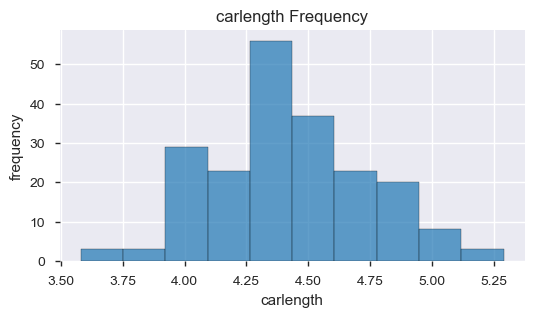

In [38]:
histogram('carlength')

In [39]:
bins_carlength = [0,3.9999,4.4999,4.9999,np.inf]
labels=['Compact','MidSize','Large','VeryLarge']
df['carsize']=pd.cut(df['carlength'],bins_carlength,labels=labels)
categorical_features.append('carsize')

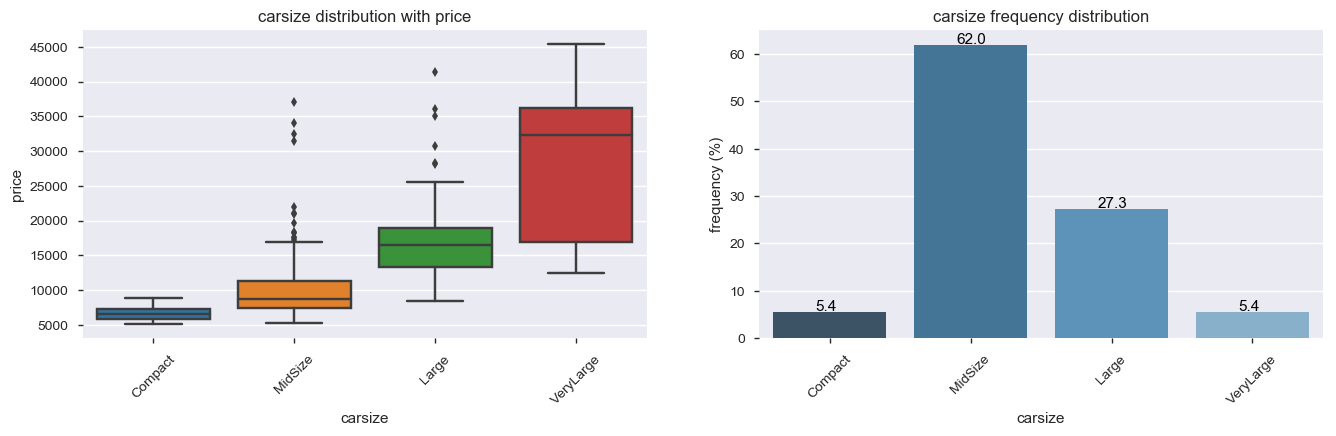

In [40]:
plot_categorical_feature('carsize')

<a id="BCN"></a>
#### 3.1.2 brandsegment: Binning using CarName
The business logic worked upon for binning based on EDA is as follows. Based on the average price of CarName
   + LowSegment: 0 to 12k
   + MidSegment: 12k to 24k
   + HighSegment: 17k plus

In [41]:
bins_carname = [0,11999.9999,23000.9999,np.inf]
labels=['LowSegment','MidSegment','HighSegment']
df_CarName['brandsegment']=pd.cut(df_CarName['price'],bins_carname,labels=labels)
categorical_features.append('brandsegment')
df_CarName

,CarName,price,brandsegment
8,jaguar,34600.000000,HighSegment
3,buick,33647.000000,HighSegment
15,porsche,31400.500000,HighSegment
2,bmw,26118.750000,HighSegment
21,volvo,18063.181818,MidSegment
1,audi,17859.166714,MidSegment
10,mercury,16503.000000,MidSegment
0,alfa-romero,15498.333333,MidSegment
13,peugeot,15489.090909,MidSegment
17,saab,15223.333333,MidSegment


In [42]:
df_CarName.drop('price',axis=1,inplace=True)
categorical_features.remove('CarName')

In [43]:
# Merge to update the dataframe with brandsegment and drop CarName column
df = df.merge(df_CarName, how='inner', on='CarName')
df.drop('CarName',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsize,brandsegment
0,3,gas,std,two,convertible,rwd,front,88.6,4.29,64.1,48.8,2548,dohc,four,2130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,MidSize,MidSegment
1,3,gas,std,two,convertible,rwd,front,88.6,4.29,64.1,48.8,2548,dohc,four,2130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,MidSize,MidSegment
2,1,gas,std,two,hatchback,rwd,front,94.5,4.35,65.5,52.4,2823,ohcv,six,2491.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,MidSize,MidSegment
3,2,gas,std,four,sedan,fwd,front,99.8,4.49,66.2,54.3,2337,ohc,four,1786.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,MidSize,MidSegment
4,2,gas,std,four,sedan,4wd,front,99.4,4.49,66.4,54.3,2824,ohc,five,2229.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,MidSize,MidSegment


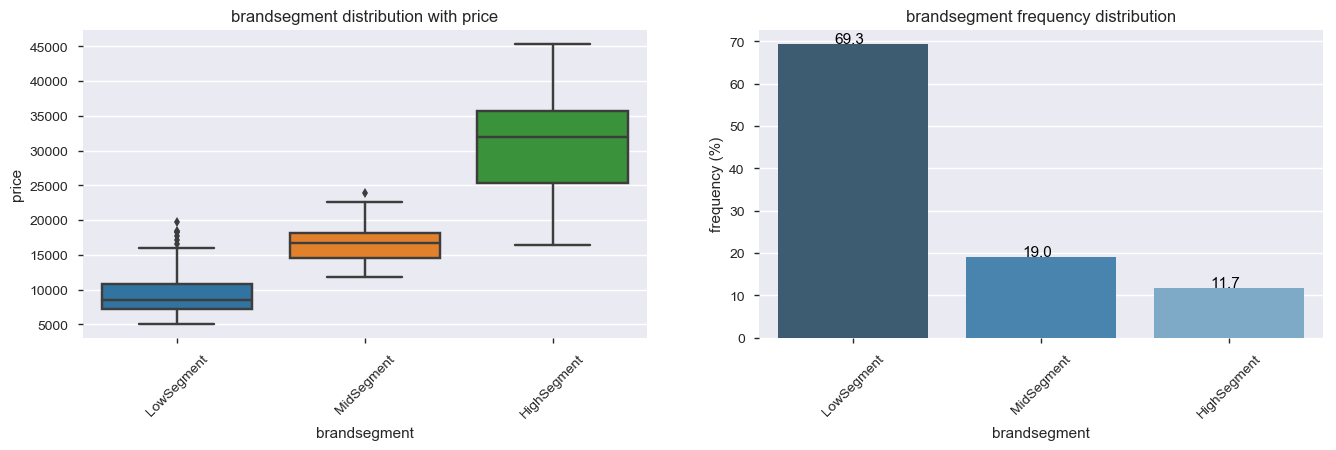

In [44]:
plot_categorical_feature('brandsegment')

<a id="PWR"></a>
#### 3.1.3 Power to Weight Ratio

In [45]:
# Good correlation between curbweight and horsepower
# Importantly, from a business perspective a better measure for these is the power-to-weight ratio
# power-to-weight ratio = horsepower / curbweight. Good measure to know the performance of the car

# NOT dropping hp or curbweight, instead deriving a new feature from it.

#Adding the derived metric and removing horsepower and curbweight
df['powerweightratio'] = df['horsepower'] / df['curbweight']
numerical_features.append('powerweightratio')

<a id="LE"></a>
### 3.2 Label Encoding - Ordered Categorical Variables

In [46]:
ordered_categorical_features = ['cylindernumber','doornumber','symboling','carsize','brandsegment']

df['cylindernumber'] = df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})
df['doornumber'] = df['doornumber'].map({'two':2,'four':4})
df['symboling'] = df['symboling'].map({3:1, 2:2, 1:3, 0:4, -1:5, -2:6, -3:7})
df['carsize'] = df['carsize'].map({'Compact':1, 'MidSize':2, 'Large':3, 'VeryLarge':4})
df['brandsegment'] = df['brandsegment'].map({'LowSegment':1, 'MidSegment':2, 'HighSegment':3})

# Removing them from the categorical_features list as the categorical features will be dummy encoded.
categorical_features.remove('cylindernumber')
categorical_features.remove('doornumber')
categorical_features.remove('symboling')
categorical_features.remove('carsize')
categorical_features.remove('brandsegment')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsize,brandsegment,powerweightratio
0,1,gas,std,2,convertible,rwd,front,88.6,4.29,64.1,48.8,2548,dohc,4,2130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2,2,0.043564
1,1,gas,std,2,convertible,rwd,front,88.6,4.29,64.1,48.8,2548,dohc,4,2130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2,2,0.043564
2,3,gas,std,2,hatchback,rwd,front,94.5,4.35,65.5,52.4,2823,ohcv,6,2491.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2,2,0.054552
3,2,gas,std,4,sedan,fwd,front,99.8,4.49,66.2,54.3,2337,ohc,4,1786.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2,2,0.043646
4,2,gas,std,4,sedan,4wd,front,99.4,4.49,66.4,54.3,2824,ohc,5,2229.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2,2,0.040722


<a id="DC"></a>
### 3.3 Dummy Encoding - Creating dummy variables for the Categorical Columns

In [47]:
# Create dummy columns for categorical variables. Create dummy dataframe, remove 1st column and concat with original df
for i in categorical_features:
    dummy_df = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(i,axis=1,inplace=True)
    
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsize,brandsegment,powerweightratio,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,2,88.6,4.29,64.1,48.8,2548,4,2130.0,3.47,2.68,9.0,111,5000,21,27,13495.0,2,2,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,2,88.6,4.29,64.1,48.8,2548,4,2130.0,3.47,2.68,9.0,111,5000,21,27,16500.0,2,2,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,2,94.5,4.35,65.5,52.4,2823,6,2491.0,2.68,3.47,9.0,154,5000,19,26,16500.0,2,2,0.054552,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,4.49,66.2,54.3,2337,4,1786.0,3.19,3.40,10.0,102,5500,24,30,13950.0,2,2,0.043646,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,4.49,66.4,54.3,2824,5,2229.0,3.19,3.40,8.0,115,5500,18,22,17450.0,2,2,0.040722,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [48]:
df.shape

(205, 42)

In [49]:
# Printing the correlation with Price
print(round(df.corr()['price']*100))

symboling                8.0
doornumber               3.0
wheelbase               58.0
carlength               68.0
carwidth                76.0
carheight               12.0
curbweight              84.0
cylindernumber          72.0
enginesize              87.0
boreratio               55.0
stroke                   8.0
compressionratio         7.0
horsepower              81.0
peakrpm                 -9.0
citympg                -69.0
highwaympg             -70.0
price                  100.0
carsize                 62.0
brandsegment            86.0
powerweightratio        53.0
fueltype_gas           -11.0
aspiration_turbo        18.0
carbody_hardtop         23.0
carbody_hatchback      -26.0
carbody_sedan           13.0
carbody_wagon           -4.0
drivewheel_fwd         -60.0
drivewheel_rwd          64.0
enginelocation_rear     32.0
enginetype_dohcv        16.0
enginetype_l             4.0
enginetype_ohc         -34.0
enginetype_ohcf          2.0
enginetype_ohcv         39.0
enginetype_rot

In [50]:
topcorr(df,list(df.columns))

TOP 10 HIGH POSITIVE CORRELATION % 

             Feature_1        Feature_2  Correlation
499   compressionratio   fuelsystem_idi         98.0
603            citympg       highwaympg         97.0
143          carlength          carsize         89.0
132          carlength       curbweight         88.0
87           wheelbase        carlength         87.0
1464  enginetype_rotor  fuelsystem_4bbl         86.0
260         curbweight       enginesize         85.0
130          carlength         carwidth         84.0
101          wheelbase          carsize         82.0
348         enginesize       horsepower         81.0

TOP 10 HIGH NEGATIVE CORRELATION % 

             Feature_1       Feature_2  Correlation
877       fueltype_gas  fuelsystem_idi       -100.0
482   compressionratio    fueltype_gas        -98.0
1119    drivewheel_fwd  drivewheel_rwd        -91.0
267         curbweight      highwaympg        -80.0
519         horsepower      highwaympg        -77.0
266         curbweight        

<a id="split"></a>
#   4. Step 4: Split Data into Training and Test Sets  

In [51]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print("Train Shape:", df_train.shape, "Test Shape:", df_test.shape)

Train Shape: (143, 42) Test Shape: (62, 42)


<a id="train"></a>
#   5. Step 5: Training the Model  

<a id="MMS"></a>
### 5.1 MinMax Scaling

Applying Scaler only on ordered categorical features and numerical features.
Not applying scaler on dummy encoded features.

In [52]:
scaled_features = numerical_features + ordered_categorical_features

In [53]:
scaler = MinMaxScaler()
df_train[scaled_features] = scaler.fit_transform(df_train[scaled_features])
df_train.describe([0.25,0.50,0.75,0.95,0.99])

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsize,brandsegment,powerweightratio,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.440559,0.559441,0.411141,0.525634,0.461655,0.509004,0.407878,0.240559,0.241317,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,13056.347322,0.440559,0.206294,0.301305,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.498199,0.205581,0.203719,0.184517,0.215378,0.211269,0.115818,0.154627,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,7807.036883,0.225875,0.347672,0.139794,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.272414,0.401274,0.304167,0.353982,0.245539,0.200000,0.135882,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,7554.000000,0.333333,0.000000,0.218294,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.400000,1.000000,0.341379,0.503185,0.425000,0.522124,0.355702,0.200000,0.184938,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,10198.000000,0.333333,0.000000,0.268725,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,0.503448,0.668790,0.550000,0.668142,0.559542,0.200000,0.301935,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,16465.000000,0.666667,0.500000,0.360401,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
95%,0.800000,1.000000,0.806897,0.899363,0.848333,0.851327,0.785881,0.400000,0.532520,0.809524,0.732323,0.906250,0.527500,0.755102,0.691667,0.700000,32185.000000,0.966667,1.000000,0.518834,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0
99%,0.916000,1.000000,0.979724,0.978599,0.950000,1.000000,0.981102,0.600000,0.743436,0.946667,0.942727,0.992125,0.795417,0.755102,0.921111,0.938919,36510.400000,1.000000,1.000000,0.784534,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.

In [54]:
y_train = df_train.pop('price')
X_train = df_train

In [55]:
y_train.shape

(143,)

<a id="RFE"></a>
### 5.2 RFE

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 11),
 ('doornumber', False, 19),
 ('wheelbase', True, 1),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', True, 1),
 ('highwaympg', False, 6),
 ('carsize', False, 10),
 ('brandsegment', True, 1),
 ('powerweightratio', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 7),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 17),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 18),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', Fa

In [57]:
feature_cols = list(X_train.columns[rfe.support_])
feature_cols

['wheelbase',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'citympg',
 'brandsegment',
 'powerweightratio',
 'fueltype_gas',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'enginelocation_rear',
 'enginetype_l',
 'enginetype_rotor',
 'fuelsystem_idi']

<a id="STATS"></a>
### 5.3 Building model using statsmodel, for the detailed statistics

In [58]:
# function for listing vif
def vif_list(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# function for listing model
def model(features):
    X_train_rfe = X_train[features]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_rfe).fit()
    print(lm.summary())
    vif_list(X_train[features])
    return lm

**Model #1**

In [59]:
lm_1 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.35e-67
Time:                        20:20:23   Log-Likelihood:                -1277.8
No. Observations:                 143   AIC:                             2596.
Df Residuals:                     123   BIC:                             2655.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.258e+04   3

Checking Three conditions
- High p-value, high VIF
- High-low:
    - High p, low VIF ==> Remove these first
    - Low p, high VIF ==> Remove these after
- Low p, Low VIF

First remove high p-value cols and recompute VIF. As it is possible VIF decreases with this variable being removed.

**Model #2**<br/>
fueltype_gas has high p-value, removing it and remodelling

In [60]:
feature_cols.remove('fueltype_gas')
lm_2 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.35e-67
Time:                        20:20:23   Log-Likelihood:                -1277.8
No. Observations:                 143   AIC:                             2596.
Df Residuals:                     123   BIC:                             2655.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.26e+04   4

**Model #3**<br/>
curbweight has high p-value, removing it and remodelling

In [61]:
feature_cols.remove('curbweight')
lm_3 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.78e-68
Time:                        20:20:23   Log-Likelihood:                -1278.2
No. Observations:                 143   AIC:                             2594.
Df Residuals:                     124   BIC:                             2651.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9445.3559   2

**Model #4**<br/>
wheelbase has high p-value, removing it and remodelling
And adding back curbweight

In [62]:
feature_cols.remove('wheelbase')
lm_4 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.62e-69
Time:                        20:20:23   Log-Likelihood:                -1279.5
No. Observations:                 143   AIC:                             2595.
Df Residuals:                     125   BIC:                             2648.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.025e+04   2

**Model #5**<br/>
carbody_sedan as a high p-value. Removing it and remodelling

In [63]:
feature_cols.remove('carbody_sedan')
lm_5 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.77e-70
Time:                        20:20:23   Log-Likelihood:                -1280.2
No. Observations:                 143   AIC:                             2594.
Df Residuals:                     126   BIC:                             2645.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9732.2061   2

**Model #6**<br/>
carbody_wagon has high p-value, removing it and remodelling

In [64]:
feature_cols.remove('carbody_wagon')
lm_6 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.36e-71
Time:                        20:20:24   Log-Likelihood:                -1280.5
No. Observations:                 143   AIC:                             2593.
Df Residuals:                     127   BIC:                             2640.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9272.4822   2

**Model #7**<br/>
carbody_hatchback has high p-value, removing it and remodelling

In [65]:
feature_cols.remove('carbody_hatchback')
lm_7 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.99e-71
Time:                        20:20:24   Log-Likelihood:                -1282.5
No. Observations:                 143   AIC:                             2595.
Df Residuals:                     128   BIC:                             2639.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9468.0808   2

**Model #8**<br/>
horsepower has high VIF, removing it and remodelling

In [66]:
feature_cols.remove('horsepower')
lm_8 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.38e-69
Time:                        20:20:24   Log-Likelihood:                -1289.9
No. Observations:                 143   AIC:                             2608.
Df Residuals:                     129   BIC:                             2649.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7389.3278   2

**Model #9**<br/>
citympg has high p-value, removing and remodelling.

In [67]:
feature_cols.remove('citympg')
lm_9 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.44e-70
Time:                        20:20:24   Log-Likelihood:                -1290.2
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     130   BIC:                             2645.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8083.7648   2

**Model #10**<br/>
compressionratio has high p-value, removing it and remodelling

In [68]:
feature_cols.remove('compressionratio')
lm_10 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.18e-71
Time:                        20:20:24   Log-Likelihood:                -1291.7
No. Observations:                 143   AIC:                             2607.
Df Residuals:                     131   BIC:                             2643.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7400.0265   1

**Model #11**<br/>
adding curbweight back 

In [69]:
feature_cols.append('curbweight')
lm_11 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.01e-71
Time:                        20:20:24   Log-Likelihood:                -1288.6
No. Observations:                 143   AIC:                             2603.
Df Residuals:                     130   BIC:                             2642.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6026.3806   2

**Model #12**<br/>
fuelsystem_idi has high p-value, removing it and remodelling

In [70]:
feature_cols.remove('fuelsystem_idi')
lm_12 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     166.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.90e-71
Time:                        20:20:25   Log-Likelihood:                -1290.7
No. Observations:                 143   AIC:                             2605.
Df Residuals:                     131   BIC:                             2641.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5220.5039   2

**Model #13**<br/>
cylindernumber has high p-value, removing and remodelling it

In [71]:
feature_cols.remove('cylindernumber')
lm_13 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.32e-72
Time:                        20:20:25   Log-Likelihood:                -1292.3
No. Observations:                 143   AIC:                             2607.
Df Residuals:                     132   BIC:                             2639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2154.5901    

**Model #14**<br/>
stroke has high p-value, removing it and remodelling

In [72]:
feature_cols.remove('stroke')
lm_14 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.72e-73
Time:                        20:20:25   Log-Likelihood:                -1292.5
No. Observations:                 143   AIC:                             2605.
Df Residuals:                     133   BIC:                             2635.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1741.2785    

**Model #15**<br/>
powerweightratio has high p-value, removing it and remodelling

In [73]:
feature_cols.remove('powerweightratio')
lm_15 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.53e-73
Time:                        20:20:25   Log-Likelihood:                -1294.3
No. Observations:                 143   AIC:                             2607.
Df Residuals:                     134   BIC:                             2633.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2284.7113    

**Model #16**<br/>
curbweight has high p-value, removing it and remodelling

In [74]:
feature_cols.remove('curbweight')
lm_16 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     237.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.19e-72
Time:                        20:20:25   Log-Likelihood:                -1298.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     135   BIC:                             2638.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2194.4795    

**Model #17**<br/>
boreratio has high p-value, removing it and remodelling

In [75]:
feature_cols.remove('boreratio')
lm_17 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.50e-73
Time:                        20:20:26   Log-Likelihood:                -1300.3
No. Observations:                 143   AIC:                             2615.
Df Residuals:                     136   BIC:                             2635.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1773.7436    

**Model #18**<br/>
enginesize has high VIF, removing it and remodelling

In [76]:
feature_cols.remove('enginesize')
lm_18 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     189.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.10e-59
Time:                        20:20:26   Log-Likelihood:                -1336.2
No. Observations:                 143   AIC:                             2684.
Df Residuals:                     137   BIC:                             2702.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1819.5210    

**Model #19**<br/>
enginetype_rotor has high p-value, removing it and remodelling

In [77]:
feature_cols.remove('enginetype_rotor')
lm_19 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.81e-60
Time:                        20:20:26   Log-Likelihood:                -1338.0
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     138   BIC:                             2701.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1814.8975    

**Model #20**<br/>
removing carwidth first and in next model replacing with carsize

In [78]:
feature_cols.remove('carwidth')
lm_20 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.63e-43
Time:                        20:20:26   Log-Likelihood:                -1380.5
No. Observations:                 143   AIC:                             2769.
Df Residuals:                     139   BIC:                             2781.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9190.5915    

**Model #21**<br/>
R2 dropped by reducing carwidth. Adding carsize to see impact

In [79]:
feature_cols.append('carsize')
lm_21 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.44e-50
Time:                        20:20:26   Log-Likelihood:                -1362.3
No. Observations:                 143   AIC:                             2735.
Df Residuals:                     138   BIC:                             2749.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5607.9533    

**Model #22**<br/>
Adding powerweightratio to see impact on R2

In [80]:
feature_cols.append('powerweightratio')
lm_22 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.41e-56
Time:                        20:20:27   Log-Likelihood:                -1344.7
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     137   BIC:                             2719.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1879.3967    

**Model #23**<br/>
enginelocation_rear has high p-value, removing it and remodelling

In [81]:
feature_cols.remove('enginelocation_rear')
lm_23 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.05e-57
Time:                        20:20:27   Log-Likelihood:                -1345.3
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     138   BIC:                             2715.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1785.4616    833.299  

**Model #24**<br/>
Add enginesize back

In [82]:
feature_cols.append('enginesize')
lm_24 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     234.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.41e-65
Time:                        20:20:27   Log-Likelihood:                -1322.6
No. Observations:                 143   AIC:                             2657.
Df Residuals:                     137   BIC:                             2675.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2139.9098    715.376  

**Model #25**<br/>
enginetype_l has high p-value, removing it.

In [83]:
feature_cols.remove('enginetype_l')
lm_25 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.29e-65
Time:                        20:20:27   Log-Likelihood:                -1325.0
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     138   BIC:                             2675.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1990.9710    721.290  

**Model #26**<br/>
enginesize has high p-value, removing it.

In [84]:
feature_cols.remove('enginesize')
lm_26 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.26e-56
Time:                        20:20:27   Log-Likelihood:                -1349.4
No. Observations:                 143   AIC:                             2707.
Df Residuals:                     139   BIC:                             2719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1522.7195    849.573  

**Baselining model lm_26 as one possibility**
 + The model has adjusted R2 of 84.5% and includes three features. 
 + Resudual Analysis and Validation on Test Data set needed to see if the model is good.

In [85]:
lm_26_feature_cols = ['brandsegment', 'carsize', 'powerweightratio']
lm_26 = model(lm_26_feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.26e-56
Time:                        20:20:27   Log-Likelihood:                -1349.4
No. Observations:                 143   AIC:                             2707.
Df Residuals:                     139   BIC:                             2719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1522.7195    849.573  

**Model #27**<br/>
Worked based on features interpreted manually basis:
 + Based on Correlation Analysis of Dependent Variable and Independent Variables
 + Based on Categorical Variable Analysis

In [86]:
lm_27_feature_cols = ['brandsegment','drivewheel_fwd','fuelsystem_2bbl','enginesize','enginelocation_rear']
lm_27 = model(lm_27_feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     227.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.48e-64
Time:                        20:20:28   Log-Likelihood:                -1324.5
No. Observations:                 143   AIC:                             2661.
Df Residuals:                     137   BIC:                             2679.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6779.8015    

**Baselining above Model#27 for evaluation**

**Model #28**<br/>
Worked based on RFE and interpreting manually basis:
 + Based on Correlation Analysis of Dependent Variable and Independent Variables
 + Based on Categorical Variable Analysis
 
'brandsegment','curbweight','enginelocation_rear'

In [87]:
lm_28_feature_cols = ['brandsegment','curbweight','enginelocation_rear']
lm_28 = model(lm_28_feature_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     326.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-62
Time:                        20:20:28   Log-Likelihood:                -1335.1
No. Observations:                 143   AIC:                             2678.
Df Residuals:                     139   BIC:                             2690.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3005.4451    

<a id="RA"></a>
#   6. Step 6: Residual Analysis  

### Residual Analysis for Model lm_26

In [88]:
X_train_rfe = X_train[lm_26_feature_cols]
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm_26.predict(X_train_rfe)

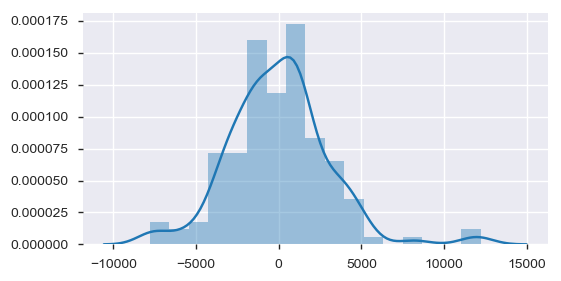

In [89]:
res = y_train - y_train_pred
plt.figure(figsize=(6,3))
sns.distplot(res)
plt.show()

Residuals normally distributed and centered around mean

### Residual Analysis for Model lm_27

In [90]:
X_train_rfe = X_train[lm_27_feature_cols]
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm_27.predict(X_train_rfe)

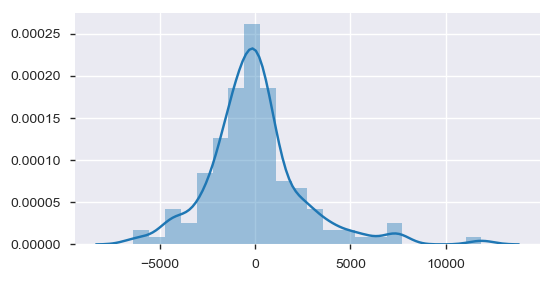

In [91]:
res = y_train - y_train_pred
plt.figure(figsize=(6,3))
sns.distplot(res)
plt.show()

Residuals normally distributed and centered around mean

### Residual Analysis for Model lm_28

In [92]:
X_train_rfe = X_train[lm_28_feature_cols]
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm_28.predict(X_train_rfe)

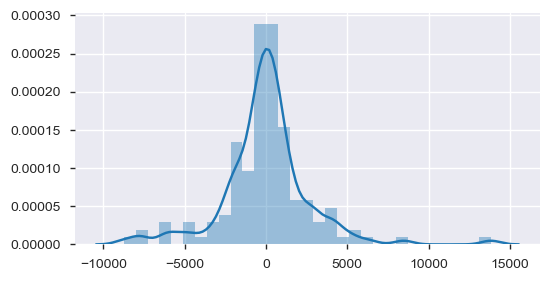

In [93]:
res = y_train - y_train_pred
plt.figure(figsize=(6,3))
sns.distplot(res)
plt.show()

Residuals normally distributed and centered around mean

<a id="evaluation"></a>
#   7. Step 7: Predictions and Evaluation on the Test Set  

In [94]:
y_test = df_test.pop('price')
df_test[scaled_features] = scaler.transform(df_test[scaled_features])

### Predicting and Evaluating for Baseline Model lm_26
Features:-
 + brandsegment
 + carsize
 + powerweightratio

Mean Square Error: 14995738.391259624
Test Data Set R-squared: 0.7858641743029791


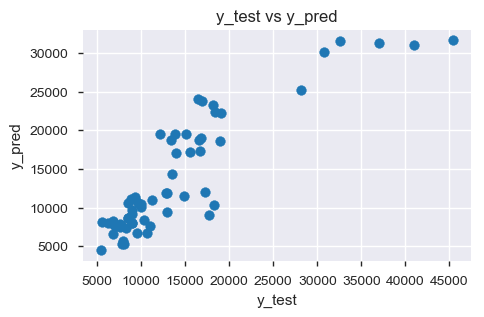

In [95]:
X_test = df_test

X_test = X_test[lm_26_feature_cols]
X_test_sm = sm.add_constant(X_test)

y_test_pred = lm_26.predict(X_test_sm)
print("Mean Square Error:", mean_squared_error(y_test, y_test_pred))
print("Test Data Set R-squared:", r2_score(y_true = y_test, y_pred = y_test_pred))
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

  Data Interpretation on Model lm_26  
 + The trained model had 84.8% R2 whereas the Test is giving 78%. 
 + The model is **not a good fit** and should be dropped

### Predicting and Evaluating for Baseline Model lm_27
Features:-
 + brandsegment
 + drivewheel_fwd
 + fuelsystem_2bbl
 + enginesize
 + enginelocation_rear

Mean Square Error: 5602355.37742995
Test Data Set R-squared: 0.9199996050015555


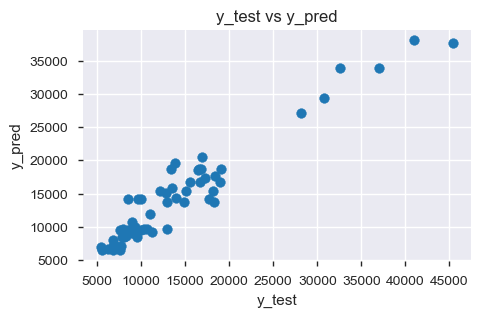

In [96]:
X_test = df_test

X_test = X_test[lm_27_feature_cols]
X_test_sm = sm.add_constant(X_test)

y_test_pred = lm_27.predict(X_test_sm)
print("Mean Square Error:", mean_squared_error(y_test, y_test_pred))
print("Test Data Set R-squared:", r2_score(y_true = y_test, y_pred = y_test_pred))
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

  Data Interpretation on Model lm_27  
 + The trained model had **R2 of 88.7%** and adjusted R2 of 88.3%
 + The test model gave an **R2 score of 91.9%** which is a close fit and signifies that **lm_27 is a good fit**.

Text(0, 0.5, 'price')

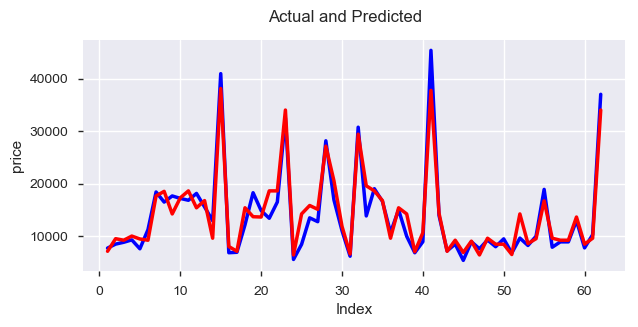

In [97]:
#Actual vs Predicted
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(7,3))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted')  
plt.xlabel('Index')    
plt.ylabel('price')  

### Predicting and Evaluating for Baseline Model lm_28
Features:-
 + brandsegment
 + curbweight
 + enginelocation_rear

Mean Square Error: 10846042.95154655
Test Data Set R-squared: 0.8451209068618805


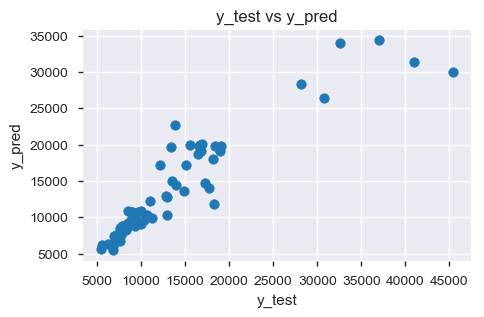

In [98]:
X_test = df_test

X_test = X_test[lm_28_feature_cols]
X_test_sm = sm.add_constant(X_test)

y_test_pred = lm_28.predict(X_test_sm)
print("Mean Square Error:", mean_squared_error(y_test, y_test_pred))
print("Test Data Set R-squared:", r2_score(y_true = y_test, y_pred = y_test_pred))
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

  Data Interpretation on Model lm_28  
 + The trained model had **R2 of 87.6%** and adjusted R2 of 87.3%
 + The test model gave an **R2 score of 84.5%** which is a close fit and signifies that lm_28 is a good fit.

<hr></hr>

### Model lm_27 with the following features is concluded as the best fit model
 + brandsegment (HighSegment, MidSegment, LowSegment)
 + drivewheel_fwd
 + fuelsystem_2bbl
 + enginesize
 + enginelocation_rear
 
The trained model had R2 of 88.7% and adjusted R2 of 88.3%

The test model gave an R2 score of 91.9%.

The equation of our best fit line is:

$ price = 6779.8015 + 9659.0548  \times  brandsegment - 1465.2305  \times  drivewheelfwd - 1433.1556 \times fuelsystem2bbl + 2.327e+04 \times enginesize + 5912.9355 \times enginelocationrear $